# Building Data Visualization and Storytelling 

### Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np

### Import Data

In [2]:
# https://dub.sh/ds-data-aggregate
data = pd.read_csv("https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv")

In [3]:
granular_data = pd.read_parquet("https://dub.sh/ds-data-granular")

In [4]:
granular_data.tail()

,donor_id,visit_date,birth_date
6252282,02q9z,2024-01-27,1987
6252283,09bDx,2024-01-27,2006
6252284,02Tg5,2024-01-27,1975
6252285,01XeZ,2024-01-27,1993
6252286,03gRz,2024-01-27,1988


In [5]:
data.tail()

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
92409,2024-01-23,W.P. Kuala Lumpur,427,101,119,198,9,91,336,412,13,2,0,392,32,3,84,265,78
92410,2024-01-24,W.P. Kuala Lumpur,306,79,87,133,7,85,221,284,11,11,0,275,23,8,42,202,62
92411,2024-01-25,W.P. Kuala Lumpur,1521,334,475,687,25,114,1407,1496,10,15,0,1386,120,15,283,744,494
92412,2024-01-26,W.P. Kuala Lumpur,189,47,57,85,0,86,103,170,11,8,0,175,14,0,16,142,31
92413,2024-01-27,W.P. Kuala Lumpur,495,124,123,235,13,122,373,465,15,15,0,449,40,6,75,332,88


In [6]:
data_m = data[data['state']=='Malaysia']

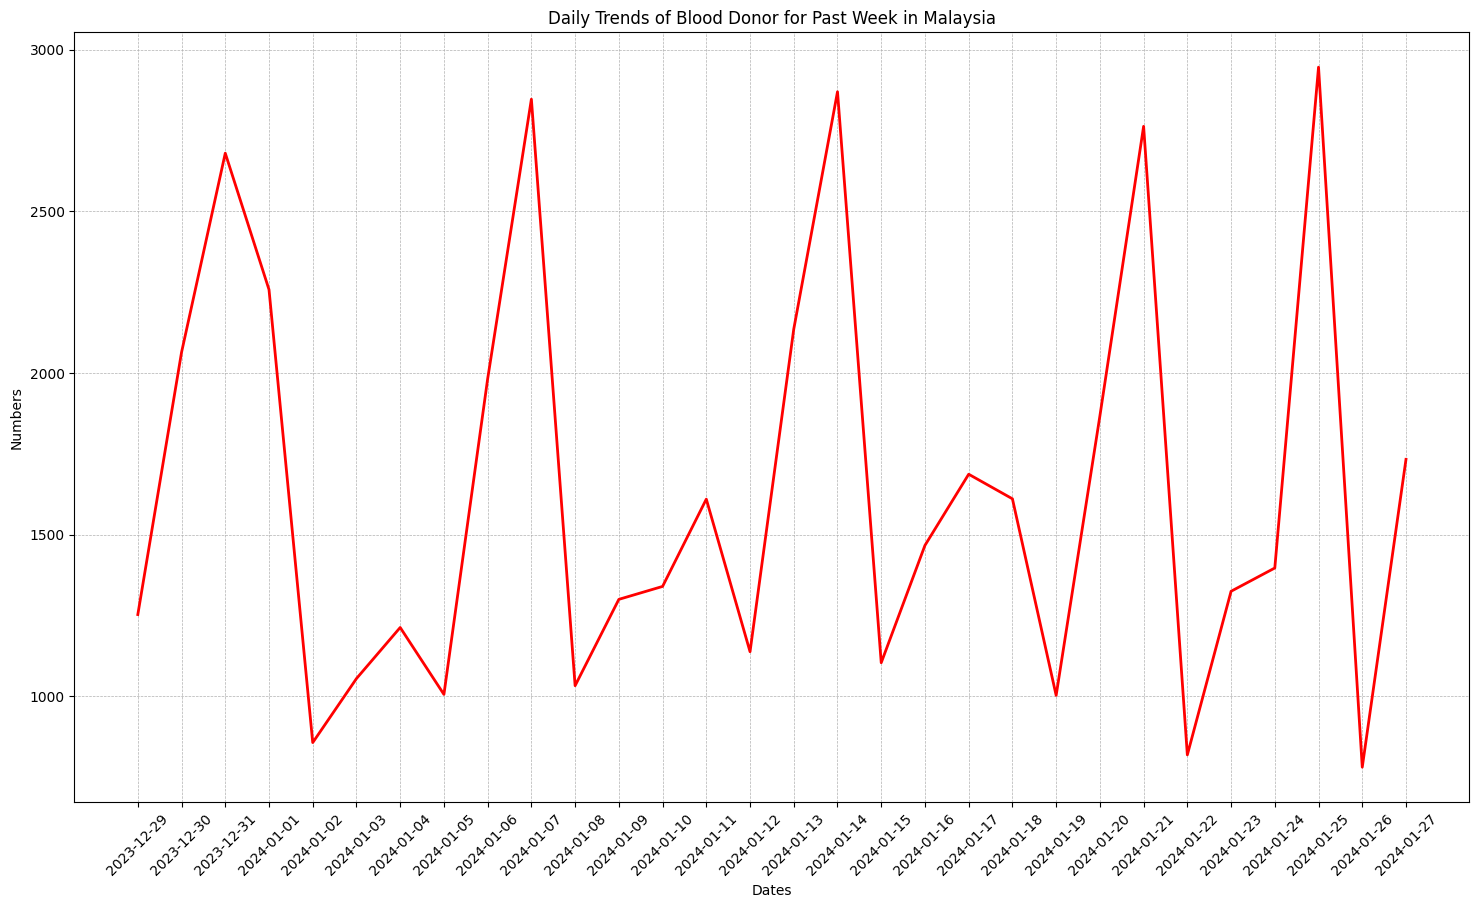

In [7]:
data_m_subset = data_m.tail(30)

plt.figure(figsize=(18, 10))
plt.plot(data_m_subset['date'], data_m_subset['daily'], color='red', linestyle='-', linewidth=2)

plt.title("Daily Trends of Blood Donor for Past Week in Malaysia")
plt.xticks(data_m_subset['date'], rotation = 45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Dates")
plt.ylabel("Numbers")

# save plot
plt.savefig("daily_trends_of_blood_donor_for_past_week.png")

plt.show()

In [8]:
data_m_subset['date'] = pd.to_datetime(data_m_subset['date'])

# Extract the day of the week
data_m_subset['day_of_week'] = data_m_subset['date'].dt.day_name()

# Group by day of the week and calculate the mean value for each day
daily_summary = data_m_subset.groupby('day_of_week')['daily'].mean()

# Create a DataFrame from the daily summary
daily_summary_df = pd.DataFrame({
    'Day of the Week': daily_summary.index,
    'Mean Daily Value': daily_summary.values
})

# Display the result
print("Day with the highest value:", daily_summary.idxmax())
print("Day with the lowest value:", daily_summary.idxmin())
print("\nDaily summary DataFrame:")
print(daily_summary_df)

Day with the highest value: Sunday
Day with the lowest value: Friday

Daily summary DataFrame:
  Day of the Week  Mean Daily Value
0          Friday           1036.20
1          Monday           1303.50
2        Saturday           1956.40
3          Sunday           2790.00
4        Thursday           1845.00
5         Tuesday           1237.25
6       Wednesday           1369.75


C:\Users\PC\AppData\Local\Temp\ipykernel_20356\2779471401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_subset['date'] = pd.to_datetime(data_m_subset['date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_20356\2779471401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_subset['day_of_week'] = data_m_subset['date'].dt.day_name()


C:\Users\PC\AppData\Local\Temp\ipykernel_20356\3229666806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['date'] = pd.to_datetime(data_m['date'])


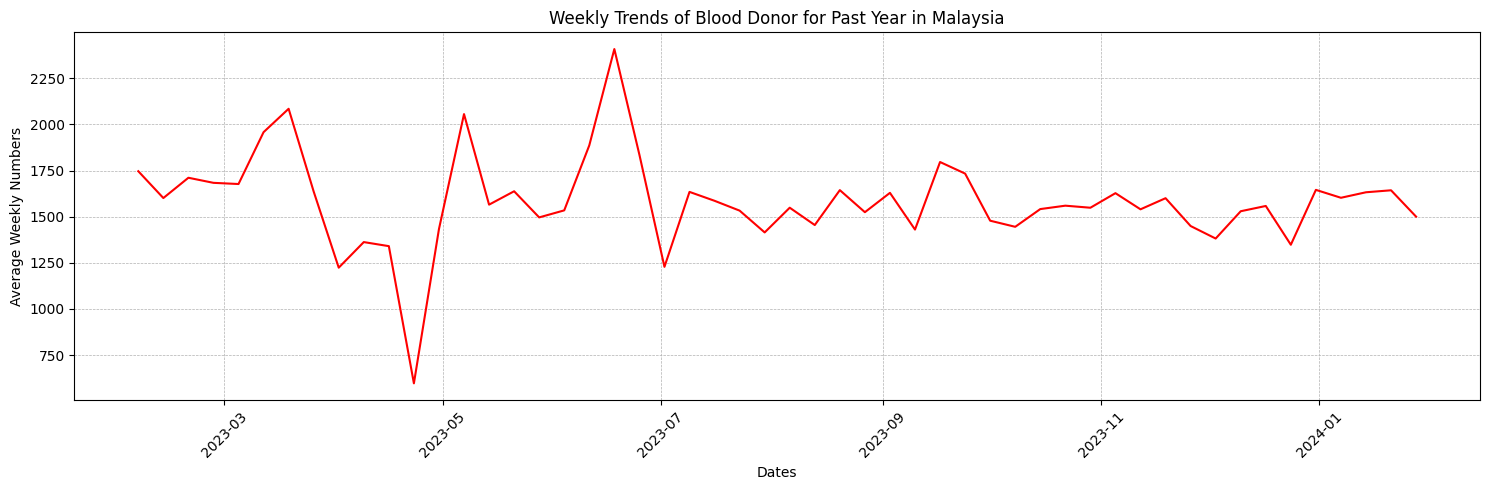

In [9]:
data_m['date'] = pd.to_datetime(data_m['date'])
data_m = data_m.set_index(['date'])
# Identify numeric columns excluding 'object' columns
numeric_columns = data_m.select_dtypes(exclude='object').columns

# Resample data and calculate monthly mean
data_weekly = data_m[numeric_columns].resample('W').mean().reset_index()

# Extract date and value columns
dates = data_weekly['date'].tail(52)
values = data_weekly['daily'].tail(52)

# Create the plot with Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red')

# Customize plot
plt.title("Weekly Trends of Blood Donor for Past Year in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Weekly Numbers")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
plt.savefig("weekly_trends_of_blood_donor_for_past_year.png")

# Display plot
plt.show()

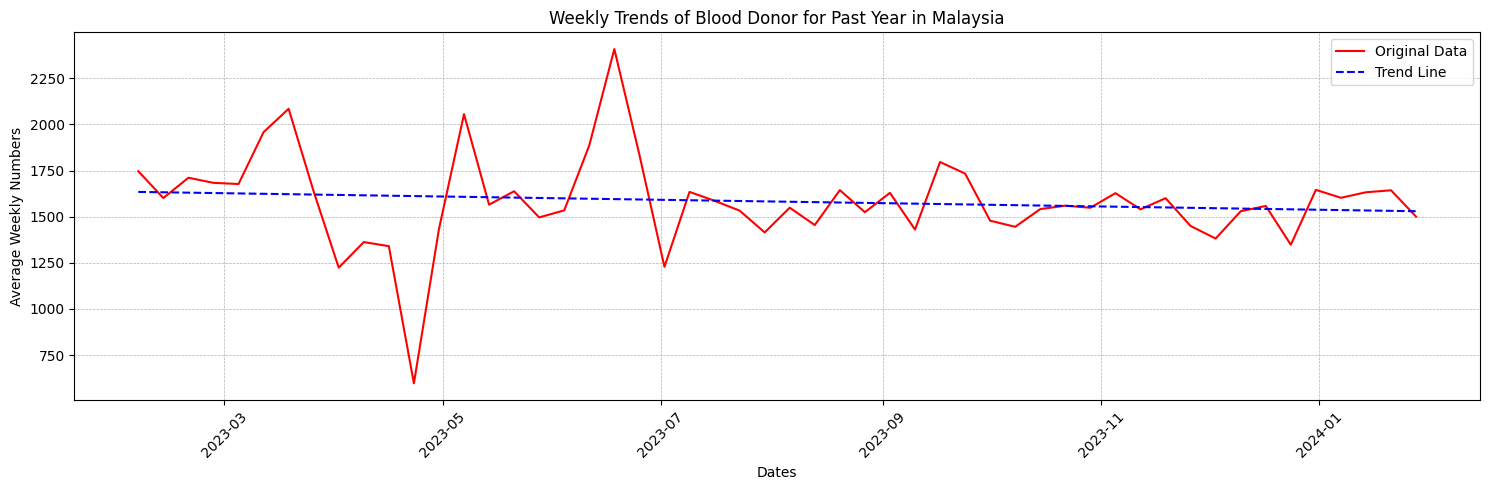

In [10]:
# Assuming 'dates' and 'values' are your data
X = np.arange(len(dates)).reshape(-1, 1)
y = values.values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the trend line
trend_line = model.predict(X)

# Plot the original data and trend line
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red', label='Original Data')
plt.plot(dates, trend_line, linestyle='--', color='blue', label='Trend Line')
plt.title("Weekly Trends of Blood Donor for Past Year in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Weekly Numbers")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
from scipy.signal import find_peaks
# Assuming 'dates' and 'values' are your data
data = pd.DataFrame({'date': dates, 'value': values})

# Extract the overall trend using linear regression
X = pd.to_numeric(data['date']).values.reshape(-1, 1)
y = data['value'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
trend_slope = model.coef_[0][0]

# Identify sudden peaks using find_peaks
peaks, _ = find_peaks(data['value'])

# Interpretation based on trend slope
if trend_slope > 0:
    trend_interpretation = "Overall increasing trend."
elif trend_slope < 0:
    trend_interpretation = "Overall decreasing trend."
else:
    trend_interpretation = "No significant overall trend."

# Interpretation based on peaks
if len(peaks) > 0:
    peak_dates = data['date'].iloc[peaks].tolist()
    peak_values = data['value'].iloc[peaks].tolist()
    peak_interpretation = f"Sudden peaks detected on {', '.join(peak_dates)} with values {', '.join(map(str, peak_values))}."
else:
    peak_interpretation = "No sudden peaks detected."

# Interpretation of constant values
if data['value'].iloc[0] == data['value'].iloc[-1]:
    constant_value_interpretation = f"The values at the first and last data points ({data['value'].iloc[0]}) are approximately the same."
else:
    constant_value_interpretation = "The values at the first and last data points are not the same."

# Display interpretations
print("Overall Trend Interpretation:", trend_interpretation)
print("Sudden Peaks Interpretation:", peak_interpretation)
print("Constant Values Interpretation:", constant_value_interpretation)


Overall Trend Interpretation: Overall decreasing trend.
Constant Values Interpretation: The values at the first and last data points are not the same.


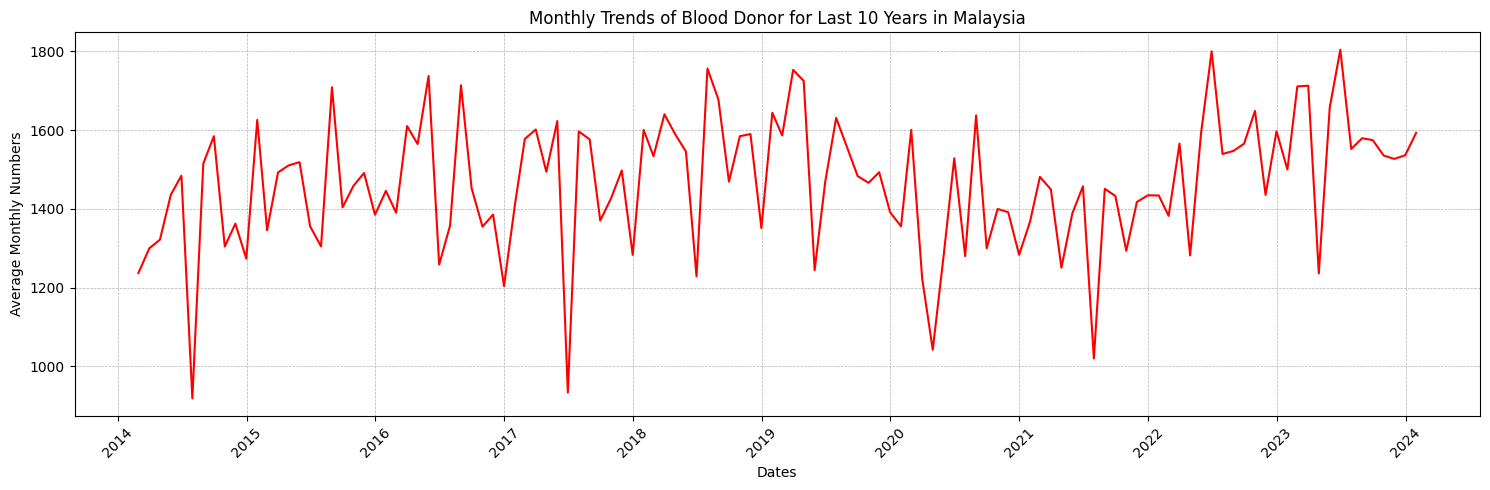

In [ ]:
# Identify numeric columns excluding 'object' columns
numeric_columns = data_m.select_dtypes(exclude='object').columns

# Resample data and calculate monthly mean
data_monthly = data_m[numeric_columns].resample('M').mean().reset_index()

# Extract date and value columns
dates = data_monthly['date'].tail(120)
values = data_monthly['daily'].tail(120)

# Create the plot with Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red')

# Customize plot
plt.title("Monthly Trends of Blood Donor for Last 10 Years in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Monthly Numbers")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# save plot
plt.savefig("monthly_trends_of_blood_donor_for_10_years.png")

# Display plot
plt.show()

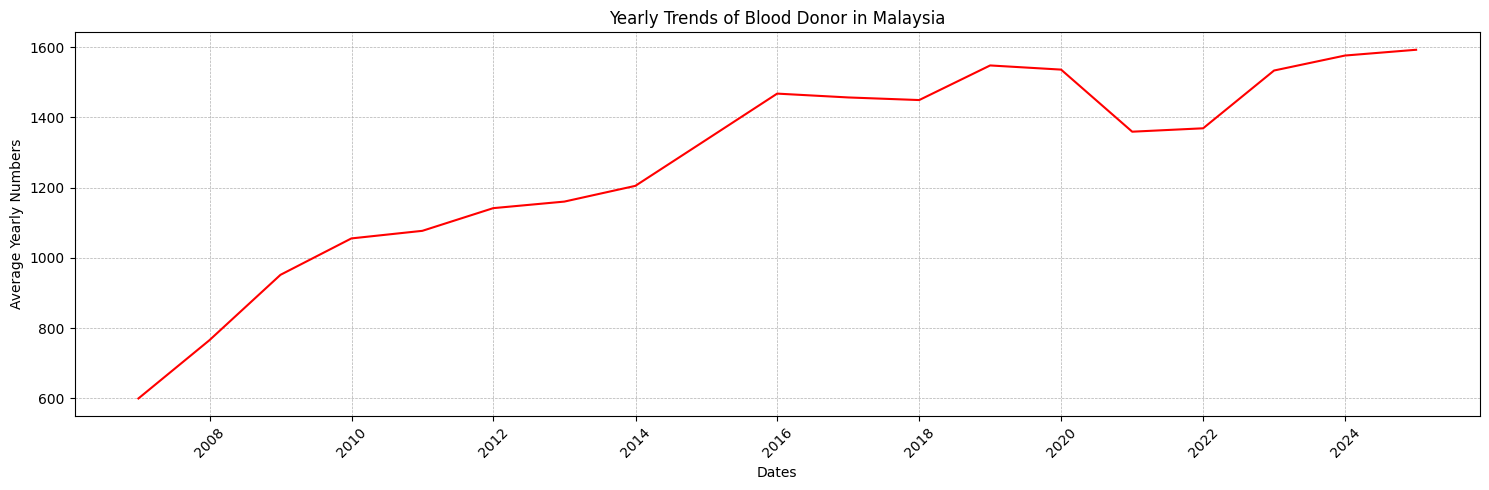

In [ ]:
# Identify numeric columns excluding 'object' columns
numeric_columns = data_m.select_dtypes(exclude='object').columns

# Resample data and calculate monthly mean
data_yearly = data_m[numeric_columns].resample('Y').mean().reset_index()

# Extract date and value columns
dates = data_yearly['date']
values = data_yearly['daily']  # Assuming 'daily' is your value column

# Create the plot with Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red')

# Customize plot
plt.title("Yearly Trends of Blood Donor in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Yearly Numbers")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# save plot
plt.savefig("yearly_trends_of_blood_donor.png")

# Display plot
plt.show()

In [ ]:
# Load the GeoJSON file
gdf_states = gpd.read_file("C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\GeoJSON Malaysia\\malaysia_singapore_brunei_State level 1.geojson")
data_x_m = data[data['state'] != 'Malaysia']
data_x_m['date'] = pd.to_datetime(data_x_m['date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_14300\4162716798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x_m['date'] = pd.to_datetime(data_x_m['date'])


In [ ]:
current_year = datetime.today().year
data_2023 = data_x_m[data_x_m['date'].dt.year == current_year-1]
data_2023.head()
annual_totals = data_2023.groupby('state')['daily'].sum()
print(annual_totals)
nation_total = data_2023['daily'].sum()
print(nation_total)
percentage_contributions = (annual_totals / nation_total) * 100
percentage_contributions = percentage_contributions.round(2)  # Round to 2 decimal places
data_percentage_contribution = pd.DataFrame(percentage_contributions)
data_percentage_contribution=data_percentage_contribution.reset_index()

state
Johor                 43706
Kedah                 21564
Kelantan              16716
Melaka                28445
Negeri Sembilan       16417
Pahang                22803
Perak                 46920
Pulau Pinang          41633
Sabah                 39826
Sarawak               41593
Selangor              30132
Terengganu            19360
W.P. Kuala Lumpur    206288
Name: daily, dtype: int64
575403


In [ ]:
data_percentage_contribution.loc[data_percentage_contribution['state'] == 'Melaka', 'state'] = 'Malacca'
data_percentage_contribution.loc[data_percentage_contribution['state'] == 'W.P. Kuala Lumpur', 'state'] = 'Kuala Lumpur'
data_percentage_contribution.loc[data_percentage_contribution['state'] == 'Pulau Pinang', 'state'] = 'Penang'

In [ ]:
# Check if "Perlis" is in the 'state' column
if 'Perlis' not in data_percentage_contribution['state'].values:
    # Adding a new row for Perlis
    new_row = pd.DataFrame({'state': 'Perlis', 'daily': 0.0}, index=[0])
    data_percentage_contribution = pd.concat([data_percentage_contribution, new_row], axis=0, ignore_index=True)

In [ ]:
data_percentage_contribution

,state,daily
0,Johor,7.60
1,Kedah,3.75
2,Kelantan,2.91
3,Malacca,4.94
4,Negeri Sembilan,2.85
5,Pahang,3.96
6,Perak,8.15
7,Penang,7.24
8,Sabah,6.92
9,Sarawak,7.23


In [ ]:
gdf_states = gdf_states[~(gdf_states['shapegroup'] == "BRN")]

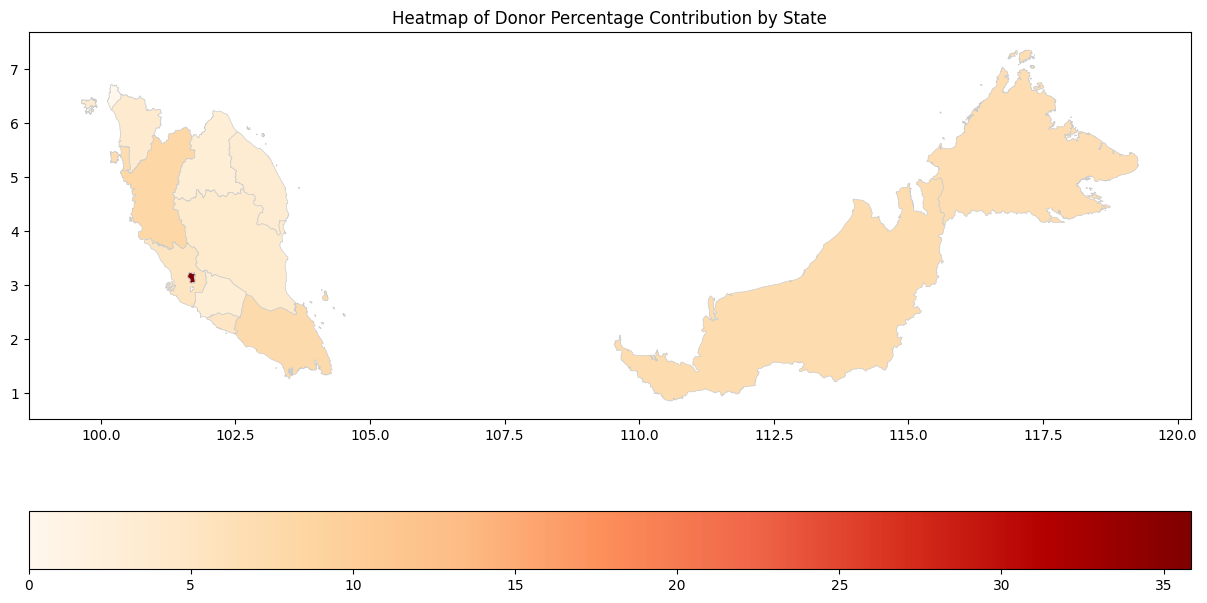

In [ ]:
# Merge the GeoPandas DataFrame with the DataFrame containing your data
merged_data = gdf_states.merge(data_percentage_contribution, left_on='shapename', right_on='state')
# set the range for the choropleth
vmin, vmax = data_percentage_contribution['daily'].min(), data_percentage_contribution['daily'].max()
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.set_title('Heatmap of Donor Percentage Contribution by State')

# Plot the choropleth map
merged_data.plot(column='daily', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, location = 'bottom')
# Display the map
plt.show()
#saving our map as .png file.
fig.savefig('map_donor_percentage_by_state.png')

In [ ]:
non_unique_ids = granular_data.loc[granular_data["donor_id"].duplicated()]
non_unique_ids

,donor_id,visit_date,birth_date
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964
5,00000,2016-08-14,1964
...,...,...,...
6250543,01wxE,2024-01-26,1983
6250546,04kPY,2024-01-26,1994
6250551,05egu,2024-01-26,1990
6250552,03LUd,2024-01-26,1993


In [ ]:
non_unique_count = len(non_unique_ids)
non_unique_count

4004507

In [ ]:
unique_ids_df = granular_data[~granular_data["donor_id"].isin(non_unique_ids["donor_id"])]
unique_ids_df

,donor_id,visit_date,birth_date
192,0000r,2019-07-24,1973
330,0000L,2019-08-24,1989
346,0000R,2012-01-08,1967
429,00014,2014-09-06,1993
499,0001h,2021-11-21,1962
...,...,...,...
6250545,09qiu,2024-01-26,1994
6250547,09qiv,2024-01-26,1970
6250548,09qiw,2024-01-26,1970
6250549,09qix,2024-01-26,1970


In [ ]:
all_donor = int(granular_data['donor_id'].nunique())
returning_donor_count = int(non_unique_ids['donor_id'].nunique())
non_returning_donor_count = int(len(unique_ids_df))

In [ ]:
percentage_return = (returning_donor_count / all_donor * 100)
formatted_percentage = f"{percentage_return:.2f}"  # Format as string
print(formatted_percentage+"%")

47.93%


In [ ]:
percentage_not_return = non_returning_donor_count/all_donor * 100
formatted_percentage_non_return = f"{percentage_not_return:.2f}"
print(formatted_percentage_non_return+"%")

52.07%


In [ ]:
unique_ids_df['visit_date'] = pd.to_datetime(unique_ids_df['visit_date'])
unique_ids_df['Age'] = unique_ids_df['visit_date'].dt.year - unique_ids_df['birth_date']

C:\Users\PC\AppData\Local\Temp\ipykernel_14300\1001573455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_ids_df['visit_date'] = pd.to_datetime(unique_ids_df['visit_date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_14300\1001573455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_ids_df['Age'] = unique_ids_df['visit_date'].dt.year - unique_ids_df['birth_date']


In [ ]:
distinct_donor_data = non_unique_ids.drop_duplicates(subset='donor_id', keep='last')
num_people_coming_more_than_once = int(len(distinct_donor_data))
print("Number of people coming more than once:", num_people_coming_more_than_once)

Number of people coming more than once: 1076551


In [ ]:
distinct_donor_data['visit_date'] = pd.to_datetime(distinct_donor_data['visit_date'])
distinct_donor_data['Age'] = distinct_donor_data['visit_date'].dt.year - distinct_donor_data['birth_date']

C:\Users\PC\AppData\Local\Temp\ipykernel_14300\374387549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_donor_data['visit_date'] = pd.to_datetime(distinct_donor_data['visit_date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_14300\374387549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_donor_data['Age'] = distinct_donor_data['visit_date'].dt.year - distinct_donor_data['birth_date']


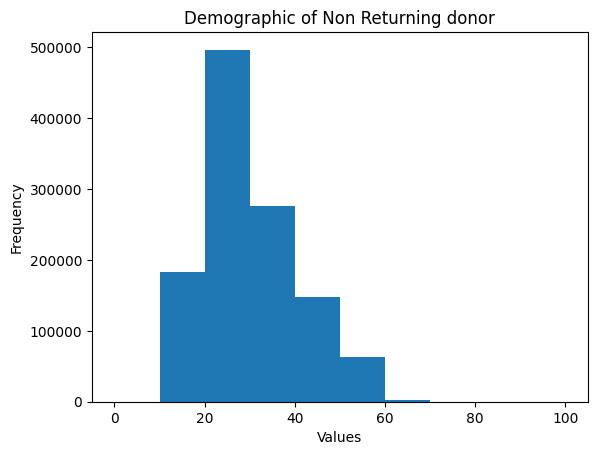

In [ ]:
bin_edges = range(0, 110, 10)
# Create the histogram
plt.hist(unique_ids_df['Age'], bins=bin_edges)  # Adjust bins as needed

# Customize the plot
plt.title("Demographic of Non Returning donor")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(False)  # Show grid on both axes

# Save the histogram as a PNG image
plt.savefig("age_demographic_of_non_returning_donor.png")

# Display the histogram
plt.show()

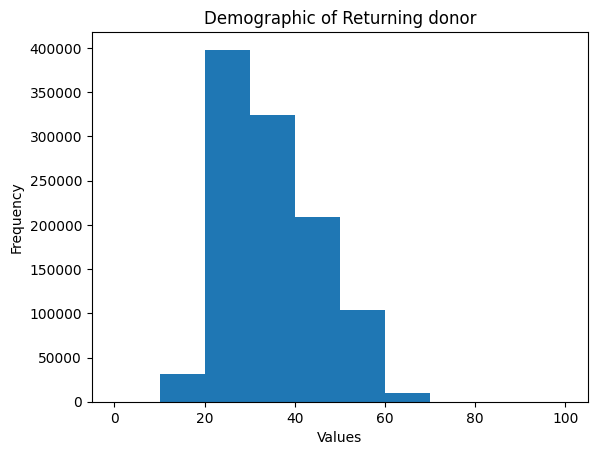

In [ ]:
bin_edges = range(0, 110, 10)
# Create the histogram
plt.hist(distinct_donor_data['Age'], bins=bin_edges)  # Adjust bins as needed

# Customize the plot
plt.title("Demographic of Returning donor")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(False)  # Show grid on both axes

# Save the histogram as a PNG image
plt.savefig("age_demographic_of_returning_donor.png")

# Display the histogram
plt.show()

In [ ]:
# Create bin edges with a bin width of 10
bin_edges = range(0, 110, 10)  # Adjust the range as needed

# Calculate the histogram using NumPy
counts, bins = np.histogram(distinct_donor_data['Age'], bins=bin_edges)

# Print the bin edges and frequencies
print("Bin Edges:", bins)
print("Frequencies:", counts)

# Optionally, create a DataFrame for further analysis
histogram_data = pd.DataFrame({"bin_edges": bins[:-1], "frequency": counts})
histogram_data

Bin Edges: [  0  10  20  30  40  50  60  70  80  90 100]
Frequencies: [     8  31544 398056 324202 208933 103777   9922     25      2      4]


,bin_edges,frequency
0,0,8
1,10,31544
2,20,398056
3,30,324202
4,40,208933
5,50,103777
6,60,9922
7,70,25
8,80,2
9,90,4


In [ ]:
# Find the index of the maximum frequency
max_frequency_index = histogram_data['frequency'].idxmax()

# Retrieve the corresponding bin edge
max_bin_edge = histogram_data.loc[max_frequency_index, 'bin_edges']

print(f"Highest Frequency: {histogram_data['frequency'].max()}")
print(f"Corresponding Bin Edge: {max_bin_edge}")

Highest Frequency: 398056
Corresponding Bin Edge: 20
